In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spammail.csv')

In [3]:
df.sample(5)

,Category,Masseges
3010,ham,"Hm good morning, headache anyone? :-)"
711,ham,It just seems like weird timing that the night...
807,ham,Boooo you always work. Just quit.
1642,ham,Sleeping nt feeling well
2870,ham,I actually did for the first time in a while. ...


In [4]:
df.shape

(5572, 2)

In [5]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

In [7]:
df['Category'].value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

In [8]:
df['Masseges'].value_counts()

Masseges
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                             

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int32 
 1   Masseges  5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [10]:
df.isnull().sum()

Category    0
Masseges    0
dtype: int64

In [11]:
df['Masseges'].duplicated().sum()

403

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
import matplotlib.pyplot as plt

In [14]:
df.head(1)

,Category,Masseges
0,0,"Go until jurong point, crazy.. Available only ..."


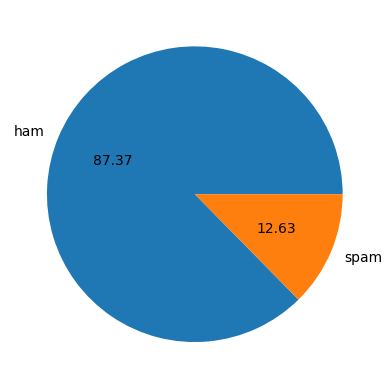

In [15]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:

df.head(1)

,Category,Masseges
0,0,"Go until jurong point, crazy.. Available only ..."


In [19]:
#this create the numberof char name coulmn for the extracting length
df['number_of_char']=df['Masseges'].apply(len)

In [20]:
#now we extect the number of words are in the each sentencex
df['number_of_words_count']=df['Masseges'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df['num_of_sent']=df['Masseges'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
# Now you can check the describe of values
df[['number_of_char','number_of_words_count','num_of_sent']].describe()

,number_of_char,number_of_words_count,num_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#import seaborn as sns
df.head(1)

,Category,Masseges,number_of_char,number_of_words_count,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [24]:
#sns.pairplot(df,hue='Masseges')
import seaborn as sns
#sns.heatmap(df.corr())

In [25]:
# now we convert all the sentences into lower case
def text_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    #this will extrect the alpha numeric values like a20 20%
    y=[]
    for i in text:
        if i.isalnum():  #this is shows all numbers in the list
            y.append(i)   #this will append the values in the y
    #return text
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return  ' '.join(y)


In [32]:
# this is also a fuction of for the above code this is the explanation of data
def text_transform(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into words
    text = nltk.word_tokenize(text)
    
    # Extract only alphanumeric values
    y = [i for i in text if i.isalnum()]
    
    # Remove stopwords and punctuation
    y = [i for i in y if i not in stopwords.words('english') and i not in string.punctuation]
    
    return y

# Test the function
result = text_transform('Hello world my name is WAQAR 20% waqar123!_ Joiya')
print(result)

['hello', 'world', 'name', 'waqar', '20', 'waqar123', 'joiya']


In [33]:
text_transform('Hello worlds mys name is WAQAR 20% waqar123!_ Joiya')

['hello', 'worlds', 'mys', 'name', 'waqar', '20', 'waqar123', 'joiya']

In [27]:
from nltk.corpus import stopwords #import laibrary for the stop words
#stopwords.words('english')  #this is the load of stop words and we show the stop words in the english

In [31]:
#this is shows the punctuation
import string
string.punctuation
#string.whitespace
#string.digits
#string.hexdigits
#"""we can also check and use following in the dataset after the   string.  whitespace -- a string containing all ASCII whitespace
#ascii_lowercase -- a string containing all ASCII lowercase letters
#ascii_uppercase -- a string containing all ASCII uppercase letters
#ascii_letters -- a string containing all ASCII letters
#digits -- a string containing all ASCII decimal digits
#hexdigits -- a string containing all ASCII hexadecimal digits
#octdigits -- a string containing all ASCII octal digits
#punctuation -- a string containing all ASCII punctuation characters
#printable -- a string containing all ASCII characters considered printable"""

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
#text_transform(df['Masseges'])

# we use steming for the removing like ing es s etc
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer() 
dd=ps.stem('dancs cars')
print(dd)

dancs car


In [35]:
df.head(1)

,Category,Masseges,number_of_char,number_of_words_count,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [36]:
df['after_apply']=df['Masseges'].apply(text_transform) # we apply the function on the whole values

In [49]:
# wordcloud is used for the extracting the most used words in the column
from wordcloud import WordCloud
wc=WordCloud(width=50,height=20,background_color='white',min_font_size=10)
#spam_wc=wc.generate(df[df['Category'] == 1]['after_apply'].str.cat(sep=' '))
text_data = df[df['Category'] == 1]['after_apply'].dropna().str.cat(sep=' ')
#print(text_data)
#plt.imshow(text_data)

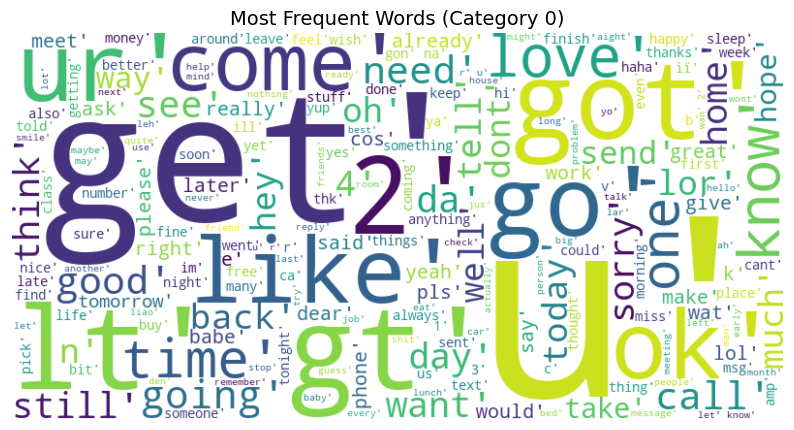

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure all values in 'after_apply' are strings and handle NaN values
df['after_apply'] = df['after_apply'].astype(str).fillna('')

# Filter the rows for Category == 1 and concatenate the text
text_data = df[df['Category'] == 0]['after_apply'].str.cat(sep=' ')

if text_data.strip():  # Check if text_data is non-empty
    # Generate the word cloud
    wc = WordCloud(width=800, height=400, background_color='white', min_font_size=10)
    spam_wc = wc.generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(spam_wc, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title("Most Frequent Words (Category 0)", fontsize=14)
    plt.show()
else:
    print("No valid text data available for Category 1.")


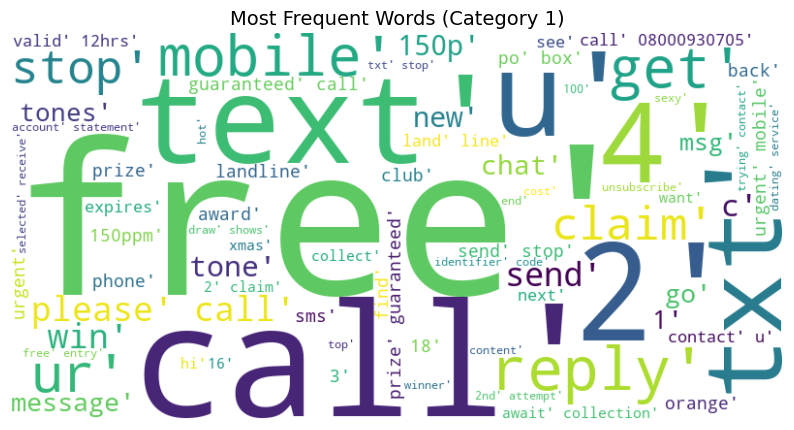

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure all values in 'after_apply' are strings and handle NaN values
df['after_apply'] = df['after_apply'].astype(str).fillna('')

# Filter the rows for Category == 1 and concatenate the text
text_data = df[df['Category'] == 1]['after_apply'].str.cat(sep=' ')

if text_data.strip():  # Check if text_data is non-empty
    # Generate the word cloud
    wc = WordCloud(width=800, height=400, background_color='white', min_font_size=10)
    spam_wc = wc.generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(spam_wc, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title("Most Frequent Words (Category 1)", fontsize=14)
    plt.show()
else:
    print("No valid text data available for Category 1.")


In [52]:
#by this we can extract the total ham masseges in the couln or dataset then we show the comparision with the after reply column
#df[df['Category']=='ham']['after_apply'] #this piece of code show the total ham masseges in the list

#now we covert it into list of string
df[df['Category']==1]['after_apply'].tolist()

["['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', '08452810075over18']",
 "['freemsg', 'hey', 'darling', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']",
 "['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hours']",
 "['mobile', '11', 'months', 'u', 'r', 'entitled', 'update', 'latest', 'colour', 'mobiles', 'camera', 'free', 'call', 'mobile', 'update', 'co', 'free', '08002986030']",
 "['six', 'chances', 'win', 'cash', '100', 'pounds', 'txt', 'csh11', 'send', 'cost', '6days', 'tsandcs', 'apply', 'reply', 'hl', '4', 'info']",
 "['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18']",
 "['xxxmobilemovieclub', 'use', 'credit'

In [53]:
# now we separate the each spam words with the other words
spam_corpus=[]
for msg in df[df['Category']==1]['after_apply'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
print(len(spam_corpus))
        

9939


In [54]:
# now we create a dictionary in which how many time a words a here
from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30) #this will show the most common 30 words in the corpus

[("'call',", 288),
 ("'free',", 158),
 ("'2',", 154),
 ("'txt',", 128),
 ("'text',", 100),
 ("'u',", 99),
 ("'ur',", 99),
 ("'mobile',", 97),
 ("'4',", 96),
 ("'claim',", 94),
 ("'reply',", 92),
 ("'stop',", 90),
 ("'prize',", 77),
 ("'get',", 62),
 ("'new',", 58),
 ("'send',", 55),
 ("'nokia',", 52),
 ("'contact',", 51),
 ("'cash',", 48),
 ("['urgent',", 48),
 ("'service',", 44),
 ("'phone',", 43),
 ("'please',", 42),
 ("'win',", 40),
 ("'week',", 39),
 ("'c',", 38),
 ("'tone',", 37),
 ("'chat',", 36),
 ("'per',", 36),
 ("'customer',", 34)]

In [ ]:
#Model Building

In [55]:
# now we convert the text data into vectors
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #here we can use others vectoriation techniques
cv=CountVectorizer()
X=cv.fit_transform(df['after_apply']).toarray()  #if we not use toarray() there is sparse data will be shown

In [59]:
X[10]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
y=df['Category'].values

In [61]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [63]:
# Naive bays model is best and good on the text data
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [64]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print('accuracy score is ',accuracy)
print('confusion metrics score is ',confusion_matrix(y_pred,y_test))
print('Precison score is is ',precision_score(y_pred,y_test))

accuracy score is  0.8771760154738878
confusion metrics score is  [[787  21]
 [106 120]]
Precison score is is  0.851063829787234


In [65]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
accuracy1=accuracy_score(y_pred1,y_test)
print('accuracy score is ',accuracy1)
print('confusion metrics score is ',confusion_matrix(y_pred1,y_test))
print('Precison score is is ',precision_score(y_pred1,y_test))

accuracy score is  0.9758220502901354
confusion metrics score is  [[876   8]
 [ 17 133]]
Precison score is is  0.9432624113475178


In [66]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
accuracy2=accuracy_score(y_pred2,y_test)
print('accuracy score is ',accuracy2)
print('confusion metrics score is ',confusion_matrix(y_pred2,y_test))
print('Precison score is is ',precision_score(y_pred2,y_test))

accuracy score is  0.9642166344294004
confusion metrics score is  [[891  35]
 [  2 106]]
Precison score is is  0.75177304964539


In [ ]:
#we can apply all the classifications models and we can apply tfidf or bag of words techniques on data
# now we import the model in the 1st step we will import the preprocesisng step then model is impooooooort
import pickle
pickle.dump(cv,open('vector.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))